#   Interpolação de  Catmull-Rom 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [345]:
N = 12
M = 12

def func(x):
    return x**2

linha = np.array ([func(x) for x in range(N*M)])

#creating a 2D grid
grid = np.reshape(linha,(N, M))
print(grid)

[[    0     1     4     9    16    25    36    49    64    81   100   121]
 [  144   169   196   225   256   289   324   361   400   441   484   529]
 [  576   625   676   729   784   841   900   961  1024  1089  1156  1225]
 [ 1296  1369  1444  1521  1600  1681  1764  1849  1936  2025  2116  2209]
 [ 2304  2401  2500  2601  2704  2809  2916  3025  3136  3249  3364  3481]
 [ 3600  3721  3844  3969  4096  4225  4356  4489  4624  4761  4900  5041]
 [ 5184  5329  5476  5625  5776  5929  6084  6241  6400  6561  6724  6889]
 [ 7056  7225  7396  7569  7744  7921  8100  8281  8464  8649  8836  9025]
 [ 9216  9409  9604  9801 10000 10201 10404 10609 10816 11025 11236 11449]
 [11664 11881 12100 12321 12544 12769 12996 13225 13456 13689 13924 14161]
 [14400 14641 14884 15129 15376 15625 15876 16129 16384 16641 16900 17161]
 [17424 17689 17956 18225 18496 18769 19044 19321 19600 19881 20164 20449]]


### Interpolação 1D - funcionando

In [250]:

def get_neighbors(l, p):
    '''pegando os vizinhos'''
    if np.floor(p) == 0:
        f0 = 0
        f1 = 0
        f2 = 1
        f3 = 2
    elif np.floor(p) == 1:
        f0 = 0
        f1 = 1
        f2 = 1
        f3 = 2
    elif np.floor(p) == len(l) - 2:  #np.floor(p) == 1 ---- mesmo caso
        f0 = len(l) - 3
        f1 = len(l) - 2
        f2 = len(l) - 2
        f3 = len(l) - 1
    elif np.floor(p) == len(l) - 1: #np.floor(p) == 0 ---- mesmo caso 
        f0 = len(l) - 1
        f1 = len(l) - 1
        f2 = len(l) - 2
        f3 = len(l) - 3
    else:  
        f1 = int(np.floor(p)) 
        f0 = f1 - 1
        f2 = f1 + 1
        f3 = f1 + 2
      
    # print('l0 ', l[f0])
    # print('l1 ', l[f1])
    # print('l2 ', l[f2])
    # print('l3 ', l[f3])

    return l[f0], l[f1], l[f2], l[f3]

In [240]:
'''normalizando o grid'''
def normalize(g, p):
    return (p - min(g)) / (max(g) - min(g)) 

'''interpolação em 1D'''
def interp_1D(g, p):
    f0, f1, f2, f3 = get_neighbors(g, p)

    f = normalize(g, p)

    d1 = (f2 - f0) / 2 
    d2 = (f3 - f1) / 2 

    D = f2 - f1 

    a3 = d1 + d2 - 2 * D
    a2 = 3 * D - 2 * d1 - d2
    a1 = d1
    a0 = f1

    # print('a0 ', a0)
    # print('a1 ', a1)
    # print('a2 ', a2)
    # print('a3 ', a3)

    return a3*f**3 + a2*f**2 + a1*f + a0

### Interpolação em 2D - ALTERADA
- pesos alterados

In [355]:
#função alterarda
def interp_2D_teste(grid, x, y, point):

    # nc = len(grid) # y - colunas
    # nl = len(grid[0]) # x - linhas

    #pegando os vizinhos em 2D
    if y == 0:
        f0 = interp_1D(grid[0], p)
        f1 = interp_1D(grid[0], p)
        f2 = interp_1D(grid[1], p+1)
        f3 = interp_1D(grid[2], p+1)
    elif y == 1: 
        f0 = interp_1D(grid[0], p)
        f1 = interp_1D(grid[1], p+1)
        f2 = interp_1D(grid[1], p+1)
        f3 = interp_1D(grid[2], p+2)
    elif  y == len(grid[0]) - 2:
        f0 = interp_1D(grid[y - 3], p-3)
        f1 = interp_1D(grid[y - 2], p-2)
        f2 = interp_1D(grid[y - 2], p-2)
        f3 = interp_1D(grid[y - 1], p-1)
    elif  y ==  len(grid[0]) - 2:
        f0 = interp_1D(grid[y - 1], p-1)
        f1 = interp_1D(grid[y - 1], p-1)
        f2 = interp_1D(grid[y - 2], p-2)
        f3 = interp_1D(grid[y - 3], p-3)
    else:
        f1 = interp_1D(grid[y], np.floor(p))
        f0 = interp_1D(grid[y-1], np.floor(p-1))
        f2 = interp_1D(grid[y+1], np.floor(p+1))
        f3 = interp_1D(grid[y+2], np.floor(p+2))

    f = normalize(grid[0], p) 

    d1 = (f2 - f0) / 2 
    d2 = (f3 - f1) / 2 

    D = f2 - f1 

    a3 = d1 + d2 - 2*D
    a2 = 3 * D - 2 * d1 - d2
    a1 = d1
    a0 = f1

    return a3*f**3 + a2*f**2 + a1*f + a0

### Interpolação 2D - 1º tentativa

In [204]:
#nao funciona ainda
def interp_2D(grid, x, y, point):


    #pegando os vizinhos em 2D
    f0 = interp_1D(grid[x-2], p-2)
    f1 = interp_1D(grid[x-1], p-1)
    f2 = interp_1D(grid[x+1], p+1)
    f3 = interp_1D(grid[x+2], p+2)

    f = normalize(grid[0], p) 

    d1 = (f2 - f0) / 2 
    d2 = (f3 - f1) / 2 

    D = f2 - f1 

    a3 = d1 + d2 - 2*D
    a2 = 3 * D - 2 * d1 - d2
    a1 = d1
    a0 = f1

    # print('a0 ', a0)
    # print('a1 ', a1)
    # print('a2 ', a2)
    # print('a3 ', a3)

    return a3*f**3 + a2*f**2 + a1*f + a0

# Testando as interpolações

In [352]:
p = 4
x = 0
y = 0
print("pos do grid " + str(grid[x][y]))
print("1d: " + str(interp_1D(grid[x], p)))
print("2d: " + str(interp_2D_teste(grid, x, y, p))) # para 2 D, 2 vezes em x pra cima e 2 pra baixo

pos do grid 0
1d: 16.265555631445938
2d: 20.719059681714043


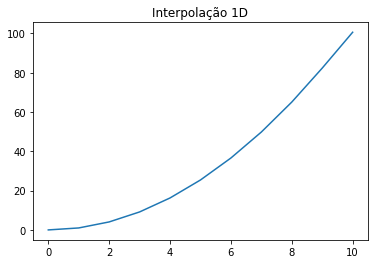

In [336]:
x = np.arange(11)
y = []
p = 0
for i in range(11):
    y.append(interp_1D(grid[0], p))
    p = p+1
plt.title("Interpolação 1D")
plt.plot(x,y)

# VISUALIZAÇÃO LINDAAAAA
### plotar todos os gráficos juntos, mapa de altura

Text(0.5, 1.0, 'Forma da função')

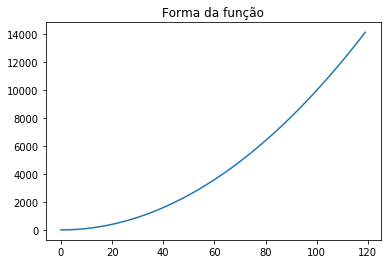

In [333]:
eixox = np.array([i for i in range(120)])
linha  = np.array([j**2 for j in range(120)])
plt.plot(eixox, linha)
plt.title("Forma da função")

In [354]:
x = np.arange(12)
y = []
i = 0
j = 0
p = [0.2, 3, 4, 5, 6, 7, 8.5, 9, 10, 10.4]
for i in range(12):
    y.append(interp_2D_teste(grid,i,i,p[i]))
plt.plot(x,y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Catmull-Rom spline interpolation
- spline precisa dos pontos de controle, então passa por todos os pontos dados, é interpolante, não aproximante
- interpolação tem que passar por cima dos pontos que voce deu
- método interpolante: passa em todos - cravar nos pontos
- método aproximante: minimos quadrados - não passa por todos os pontos - não vai achar um polinomio melhor do que aquele com aquele grau 